In [1]:
import sys
!{sys.executable} -mpip install -q seaborn nameparser

In [2]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from nameparser import HumanName

from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [3]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# Challenge Assemby Analysis
`realitychangers.org-challenge_assembly-2` Last Update: 2019-05-27T16:19:12

__




 
 
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)
 
## Resources

* ** [accepted_students](data/accepted_students.csv)**. 
* ** [all_students](data/all_students.csv)**. 
 
## References

* **[accepted_students_source](gs://1rCBl4ay7QFCaqKpEd66_u7TtgB2yN7EFXO40HTkQddM)**. 
* **[all_students_source](gs://16ENWTVx4c_IuQqYDpMVLGIslnSuI9wZF6adK3qO6gHg)**.

In [4]:
# Maps only the race_eth of accepted students
race_eth_map = {
 'Latino': 'Latino',
 'Filipino': 'Filipino',
 'Black': 'Black',
 'Mexican': 'Latino',
 'Black, White': 'Black',
 'Hispanic or Latino': 'Latino',
 'Hispanic': 'Latino',
 'Asian': 'Asian',
 'African American': 'Black',
 'Hispanic or Latino, African American': 'Latino',
 'Somalian': 'Black',
 'African America/Black': 'Black',
 'Hispanic or Latino, Native American': 'Latino',
 'African American/Black, Native American': 'Black',
 'African American/Black': 'Black'}

In [32]:
astd = pkg.resource('accepted_students').dataframe()
students = pkg.resource('all_students').dataframe()
students['gpa_delta'] = students.gpa2 -  students.gpa1
m = astd.merge(students, on='name_key', how='outer')
m['race_eth'] = m.race_eth.apply( lambda v: race_eth_map.get(v,'Unknown'))
m['accepted'] = ~m.year_x.isnull()
m['live_with_mexican_mother'] = (m.live_with_mom == 'Yes') & (m.mother_birth_country == 'Mexico')

accepted = m[m['accepted']].dropna(subset=['gpa1', 'gpa2'])
not_accepted = m[~m['accepted']].dropna(subset=['gpa1', 'gpa2'])


False    473
True      60
Name: live_with_mexican_mother, dtype: int64

In [36]:
len(astd), len(accepted)

(131, 55)

The t-statistic is the difference in means divided by the standard error: 

$t_{\widehat{\beta}} = \frac{\widehat\beta - \beta_0}{\operatorname{s.e.}(\widehat\beta)}$

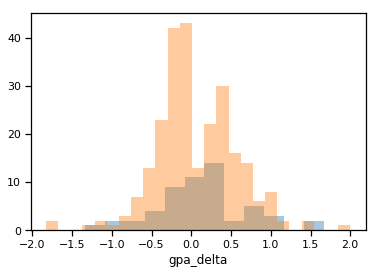

In [6]:
fig, ax = plt.subplots()

sns.distplot(accepted.gpa_delta, ax=ax, kde=False)
sns.distplot(not_accepted.gpa_delta, ax=ax, kde=False)

In [7]:
accepted.gpa_delta.describe()

count    55.000000
mean      0.130364
std       0.598021
min      -1.340000
25%      -0.165000
50%       0.160000
75%       0.340000
max       1.670000
Name: gpa_delta, dtype: float64

In [8]:
not_accepted.gpa_delta.describe()

count    251.000000
mean       0.066614
std        0.493992
min       -1.830000
25%       -0.170000
50%        0.000000
75%        0.330000
max        2.000000
Name: gpa_delta, dtype: float64

In [9]:
ttest_ind(accepted.gpa_delta, not_accepted.gpa_delta)

Ttest_indResult(statistic=0.8330400954506197, pvalue=0.40547610923636035)

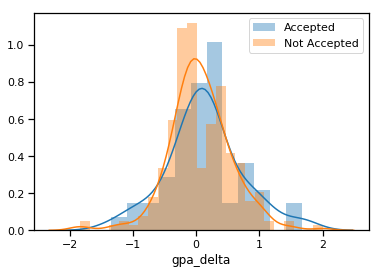

In [39]:
t = accepted[accepted.live_with_mom.notnull()]

ax = sns.distplot(accepted.gpa_delta,  kde=True, label='Accepted')
sns.distplot(not_accepted.gpa_delta, ax=ax, kde=True, label='Not Accepted')
plt.legend()

In [10]:
ttest_1samp(accepted.gpa_delta, 0)

Ttest_1sampResult(statistic=1.616669132269748, pvalue=0.11177745505130127)

In [34]:
def multi_2t_test(accepted, not_accepted):
    for variable in ('sex','race_eth','live_with_mom','mother_birth_country','live_with_father','father_birth_country', 'mother_ed',
                    'live_with_mexican_mother'):
        for value in accepted[variable].unique():
            accepted_gpa_diff = accepted[accepted[variable]==value].gpa_delta.dropna()
            not_accepted_gpa_diff = not_accepted[not_accepted[variable]==value].gpa_delta.dropna()
            tt = ttest_ind(accepted_gpa_diff, not_accepted_gpa_diff)
            if tt.pvalue <= .05:
                print(variable, value, len(accepted_gpa_diff), accepted_gpa_diff.mean())
                
multi_2t_test(accepted, not_accepted)

live_with_mom Yes 16 0.436875
mother_birth_country Mexico 18 0.32222222222222224
live_with_father No 6 0.5516666666666667
father_birth_country Don't Know 2 0.15000000000000008
live_with_mexican_mother True 7 0.5228571428571429


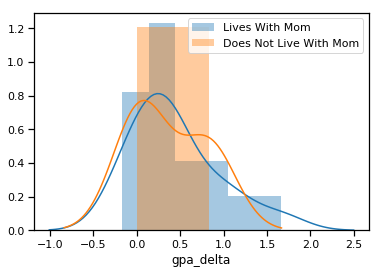

In [38]:

t = accepted[accepted.live_with_mom.notnull()]

ax = sns.distplot(t[t.live_with_mom == 'Yes'].gpa_delta,  kde=True, label='Lives With Mom')
sns.distplot(t[t.live_with_mom == 'No'].gpa_delta, ax=ax, kde=True, label='Does Not Live With Mom')
plt.legend()

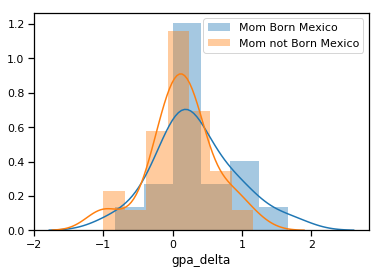

In [41]:
t = accepted[accepted.mother_birth_country.notnull()]

ax = sns.distplot(t[t.mother_birth_country == 'Mexico'].gpa_delta,  kde=True, label='Mom Born Mexico')
sns.distplot(t[t.mother_birth_country != 'Mexico'].gpa_delta, ax=ax, kde=True, label='Mom not Born Mexico')
plt.legend()